# Fraud_check

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
# Renaming columns
df1 = df.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
df1.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
df1.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


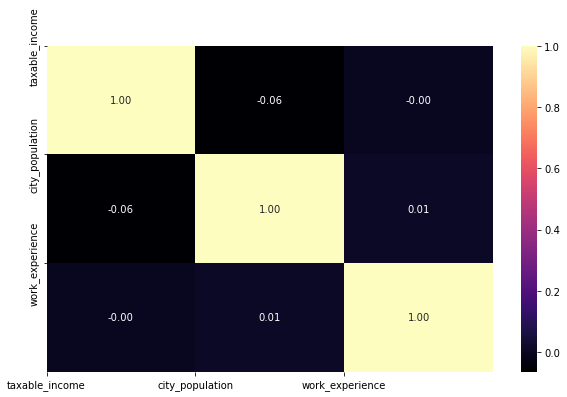

In [9]:
import seaborn as sns
# Correlation analysis for data
corr = df1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [10]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1['taxable_category'] = pd.cut(x = df1['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [11]:
df1['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [12]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

df1['under_grad'] = label_encoder.fit_transform(df1['under_grad'])
df1['marital_status'] = label_encoder.fit_transform(df1['marital_status'])
df1['urban'] = label_encoder.fit_transform(df1['urban'])
df1['taxable_category'] = label_encoder.fit_transform(df1['taxable_category'])
df1.head(10)

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


In [13]:
# dropping column taxable_income
df2 = df1.drop('taxable_income', axis = 1)
df2

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


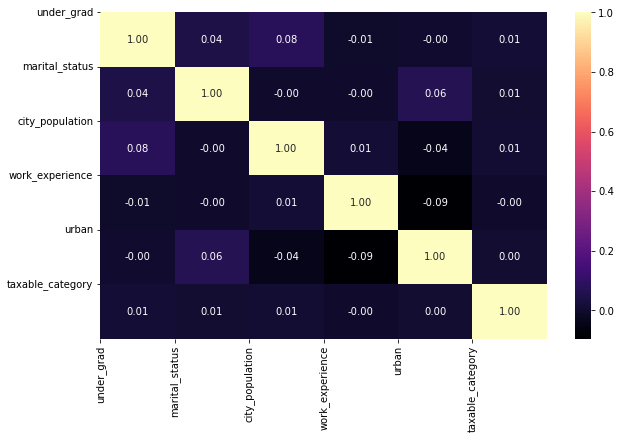

In [14]:
# Correlation analysis for data11
corr = df2.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [15]:
# Dividing data into independent variables and dependent variable
X = df2.drop('taxable_category', axis = 1)
y = df2['taxable_category']

In [16]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

### Building model based on C5.0 Algorithm

In [17]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

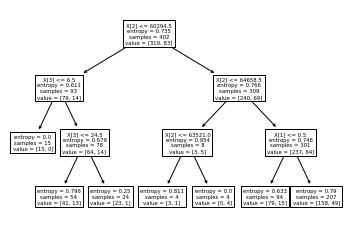

In [18]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [19]:
# Predicting Data
Fraud_data_preds = model_c5.predict(x_test)
pd.Series(Fraud_data_preds).value_counts()

0    197
1      1
dtype: int64

In [20]:
Fraud_data_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Creating cross tables for checking model
pd.crosstab(y_test, Fraud_data_preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [22]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.7878787878787878

### Building model based on CART Algorithm

In [23]:
Fraud_data_model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
Fraud_data_model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

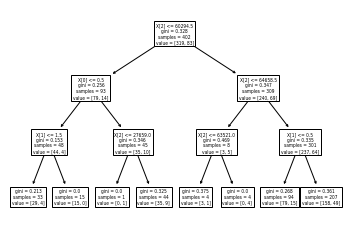

In [24]:
# Plotting Decision tree
tree.plot_tree(Fraud_data_model_CART);

In [25]:
# Predicting Data
Fraud_data_preds1 = Fraud_data_model_CART.predict(x_test)
pd.Series(Fraud_data_preds1).value_counts()

0    197
1      1
dtype: int64

In [26]:
preds=Fraud_data_preds1

In [27]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [28]:
# Checking accuracy of model
Fraud_data_model_CART.score(x_test, y_test)

0.7878787878787878